### Imports

In [1]:
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from PIL import Image
import math

/Users/atifadib/opt/anaconda3/envs/torch_env/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


### Loading Image

In [2]:
# Load an example image
image_path = './sample_img.jpg'
my_image = Image.open(image_path)

# Define patch size
patch_size = 16  # 16x16 patches

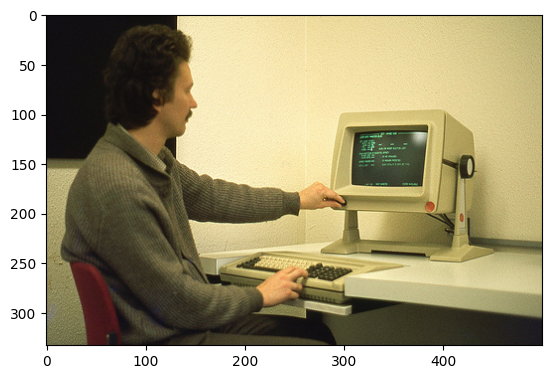

In [ ]:
plt.imshow(my_image)

### Transforming the Image

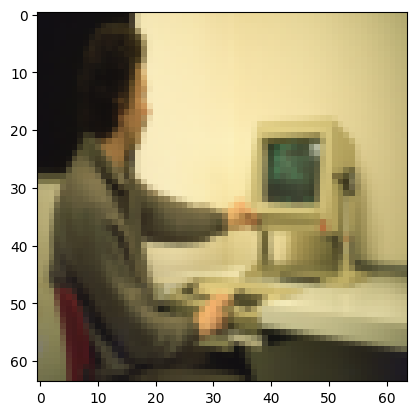

In [4]:
# Transforming the image
# Transformations
my_transforms = transforms.Compose([transforms.Resize((64, 64)),
                                    transforms.ToTensor()])
image_tensor = my_transforms(my_image)

# Plotting Transformed Image and Re-sized Image
plt.imshow(image_tensor.permute(1,2,0))

### Adding a method to Patch our Image

In [59]:
def patch_image(image_tensor, patch_size, ncols=4):
    patches = image_tensor.unfold(1, patch_size, patch_size).unfold(2, patch_size, patch_size)
    patches = patches.contiguous().view(3, 16, 16, 16)
    n = patches.shape[1]
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 2, nrows * 2))

    for i, ax in enumerate(axes.flat):
        if i <= n:
            ax.imshow(patches[:,i,:,:].permute(1, 2, 0))  # Convert tensor back to image format
            ax.axis('off')
        else:
            ax.axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.1)


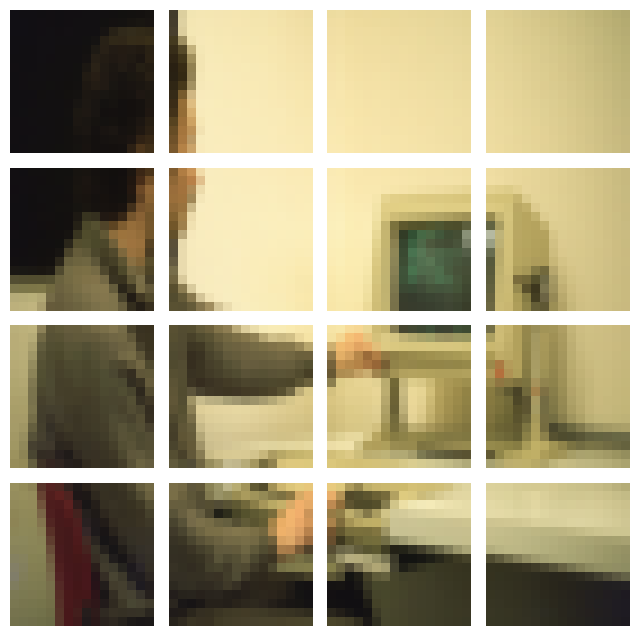

In [60]:
patch_image(image_tensor, patch_size=patch_size)

In [54]:
encoder_layer = torch.nn.TransformerEncoderLayer(d_model=768, nhead=8)

In [55]:
transformer_encoder = torch.nn.TransformerEncoder(encoder_layer, num_layers=6)

In [67]:
patches = image_tensor.unfold(1, patch_size, patch_size).unfold(2, patch_size, patch_size)
patches = patches.contiguous().view(3, 16, 16, 16)

In [68]:
patches.shape

torch.Size([3, 16, 16, 16])

In [70]:
patches[0,0,:,:]

tensor([[0.0667, 0.0667, 0.0667, 0.0667, 0.0706, 0.0667, 0.0706, 0.0706, 0.0706,
         0.0706, 0.0706, 0.0706, 0.0706, 0.0745, 0.0784, 0.0863],
        [0.0667, 0.0667, 0.0667, 0.0706, 0.0706, 0.0667, 0.0706, 0.0706, 0.0706,
         0.0706, 0.0706, 0.0784, 0.0784, 0.0902, 0.0980, 0.0941],
        [0.0667, 0.0667, 0.0667, 0.0706, 0.0706, 0.0706, 0.0745, 0.0706, 0.0706,
         0.0706, 0.0902, 0.1529, 0.1882, 0.2000, 0.1961, 0.1882],
        [0.0667, 0.0667, 0.0667, 0.0706, 0.0706, 0.0706, 0.0706, 0.0706, 0.0706,
         0.0824, 0.1569, 0.1882, 0.1882, 0.2078, 0.2078, 0.2196],
        [0.0667, 0.0667, 0.0667, 0.0706, 0.0706, 0.0706, 0.0706, 0.0706, 0.0745,
         0.1176, 0.1569, 0.1333, 0.1373, 0.1373, 0.1294, 0.1608],
        [0.0667, 0.0667, 0.0667, 0.0706, 0.0706, 0.0706, 0.0706, 0.0706, 0.0824,
         0.1490, 0.1373, 0.1255, 0.1373, 0.1255, 0.1098, 0.1647],
        [0.0706, 0.0667, 0.0667, 0.0706, 0.0706, 0.0706, 0.0706, 0.0706, 0.1059,
         0.1647, 0.1294, 0.1098, 0.12

In [69]:
patches.permute(1, 2, 3, 0)

tensor([[[[0.0667, 0.0588, 0.0784],
          [0.0667, 0.0588, 0.0745],
          [0.0667, 0.0588, 0.0745],
          ...,
          [0.0745, 0.0667, 0.0588],
          [0.0784, 0.0667, 0.0588],
          [0.0863, 0.0745, 0.0627]],

         [[0.0667, 0.0588, 0.0784],
          [0.0667, 0.0588, 0.0784],
          [0.0667, 0.0588, 0.0745],
          ...,
          [0.0902, 0.0784, 0.0627],
          [0.0980, 0.0863, 0.0667],
          [0.0941, 0.0784, 0.0667]],

         [[0.0667, 0.0588, 0.0784],
          [0.0667, 0.0588, 0.0784],
          [0.0667, 0.0588, 0.0745],
          ...,
          [0.2000, 0.1725, 0.1059],
          [0.1961, 0.1647, 0.0941],
          [0.1882, 0.1569, 0.0902]],

         ...,

         [[0.0706, 0.0588, 0.0706],
          [0.0706, 0.0588, 0.0706],
          [0.0706, 0.0588, 0.0706],
          ...,
          [0.0902, 0.0745, 0.0588],
          [0.1255, 0.0941, 0.0667],
          [0.1686, 0.1255, 0.0745]],

         [[0.0706, 0.0588, 0.0706],
          [0.0667